# **Uczenie nadzorowane - klasyfikacja**

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
)

#### **Załadowanie danych**

In [2]:
data = pd.read_csv('wine.data', header=None)
data.columns = ['Cultivar', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
                'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
                'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315', 'Proline']
data.head()

,Cultivar,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


##### **Podział danych na zbiór treningowy i testowy**

In [3]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

#### **Normalizacja danych**
Dane poddaje się normalizacji lub standaryzacji, ponieważ wiele modeli używa metryk odległości lub zakłada, że dane są porównywalne liczbowo. Gdy cechy mają różny zakres (np. wiek i zarobki) te o większych wartościach mogą zdominować pozostałe i zafałszować wyniki. Przeskalowanie wartości pozwala uniknąć tego problemu. Dokonuje się tego zawsze po podziale na zbiory treningowy i testowy, aby dane testowe nie miały wpływu na skalowanie (założenie jest takie, że model nigdy wcześniej nie widział danych testowych).

In [4]:
normalizer = Normalizer()
normalizer.fit(X)
X = normalizer.transform(X)

## **Trenowanie modeli**
#### **KNeighborsClassifier**
 Algorytm klasyfikacji, który przypisuje etykietę nowemu punktowi na podstawie większości klas jego najbliższych sąsiadów w przestrzeni cech.

In [5]:
params = {'n_neighbors': [3, 5, 7, 9]}
knn = KNeighborsClassifier(n_neighbors=7)
grid_search = GridSearchCV(knn, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=7),
             param_grid={'n_neighbors': [3, 5, 7, 9]}, scoring='accuracy')

In [6]:
knn = grid_search.best_estimator_
y_pred_knn = knn.predict(X_test)

#### **RandomForestClassifier**
Tworzy las drzew decyzyjnych — każdy z nich uczy się na losowym fragmencie danych i wybiera różne cechy, a ostateczna decyzja podejmowana jest na podstawie głosowania większościowego tych drzew.

In [7]:
params = {'max_depth': [2, 3, 4, 5, 10, 15, None]}
rfc = RandomForestClassifier(random_state=10)
grid_search = GridSearchCV(rfc, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
             param_grid={'max_depth': [2, 3, 4, 5, 10, 15, None]},
             scoring='accuracy')

In [8]:
rfc = grid_search.best_estimator_
y_pred_rfc = rfc.predict(X_test)

#### **Ocena modeli**
*Accuracy* to najprostsza metryka oceny modeli, mówi nam jaka część klasyfikacji była poprawna.

In [9]:
print('Accuracy KNN : ', accuracy_score(y_test, y_pred_knn))
print('Accuracy RandomForest : ', accuracy_score(y_test, y_pred_rfc))

Accuracy KNN :  0.6388888888888888
Accuracy RandomForest :  1.0


#### **Macierze konfuzji**
Graficzne przedstawienie osiągów modeli klasyfikacji.

In [10]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_rfc = confusion_matrix(y_test, y_pred_rfc)

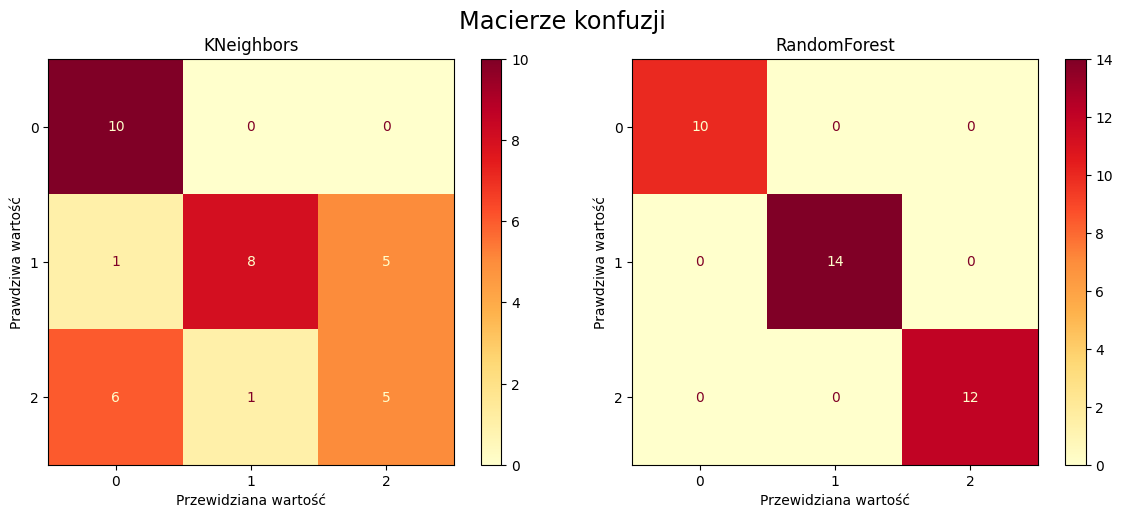

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
disp_knn = ConfusionMatrixDisplay(cm_knn)
disp_knn.plot(cmap='YlOrRd', ax=ax[0])
disp_rfc = ConfusionMatrixDisplay(cm_rfc)
disp_rfc.plot(cmap='YlOrRd', ax=ax[1])
ax[0].set_xlabel('Przewidziana wartość'); ax[0].set_ylabel('Prawdziwa wartość')
ax[1].set_xlabel('Przewidziana wartość'); ax[1].set_ylabel('Prawdziwa wartość')
ax[0].set_title('KNeighbors'); ax[1].set_title('RandomForest')
fig.suptitle('Macierze konfuzji', fontsize='xx-large')
plt.tight_layout()
plt.show()

#### **Metryki oceniające modele**
**Accuracy** - Najprostsza i najłatwiejsza do zrozumienia, procent poprawnie sklasyfikowanych rekordów.

**Precision** - Procent poprawnie przewidzianych rekordów dla danej klasy wśród wszystkich rekordów przewidzianych jako należące do tej klasy.

**Recall** - Procent poprawnie przewidzianych rekordów dla danej klasy wśród wszystkich rzeczywistych rekordów należących do tej klasy.  

**F1-score** - Średnia harmoniczna precyzji i czułości dla danej klasy, równoważąca oba te aspekty.

**Classification Report** - Tabela przedstawiająca wyniki klasyfikacji, pokazująca metryki dla każdej klasy.





In [14]:
print('Metryki oceniające modele')
print('KNeighbors')
print(classification_report(y_test, y_pred_knn))
print('======================================================')
print('RandomForest')
print(classification_report(y_test, y_pred_rfc))

Metryki oceniające modele
KNeighbors
              precision    recall  f1-score   support

           1       0.59      1.00      0.74        10
           2       0.89      0.57      0.70        14
           3       0.50      0.42      0.45        12

    accuracy                           0.64        36
   macro avg       0.66      0.66      0.63        36
weighted avg       0.68      0.64      0.63        36

RandomForest
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### **Podsumowanie wyników**
**KNeighbors** radzi sobie dobrze z klasą 1 (wysoki recall), ale ma problemy z klasą 3 (niskie precision i recall). Klasa 2 ma wysoką precyzję, ale niski recall, co sugeruje, że model pomija niektóre przypadki tej klasy.

**Random Forest** osiąga perfekcyjne wyniki dla wszystkich klas, co wskazuje na idealne dopasowanie do danych testowych.

#### **Potencjalne przyczyny różnic osiągów algorytmów**

**Random Forest**: Lepiej modeluje nieliniowe zależności dzięki zespołowi drzew. GridSearchCV (max_depth) pozwolił idealnie dopasować model, ale wynik 1.00 może wskazywać na przeuczenie na małym zbiorze (36 próbek).

**KNeighbors**: Oparty na odległościach, gorzej radzi sobie z nieliniowymi granicami klas. Słabe wyniki dla klasy 3 (recall = 0.42) sugerują trudności z separacją klas.

Mały zbiór testowy (36 próbek) sprzyja Random Forest, który może się przeuczyć. KNeighbors jest mniej skuteczny, jeśli klasy się nakładają.




